# Project 1:  Clustering Algorithms

## Assignment Overview

### Objective:
To gain experience in implementing clustering techniques on real-world datasets.

### About the data:
The Economist Democracy Index is an annual index compiled by the UK-based magazine, The Economist,   
through its Economist Intelligence Unit (EIU). This index rates the state of democracy across countries worldwide.    
  
It is based on five categories:

- **Electoral Process and Pluralism:**   
This measures the fairness of elections, the freedom to form political parties, and the participation of various groups in the political process.  

- **Functioning of Government:** This evaluates how effectively governments operate, the quality of governance, the level of corruption, and whether political decisions are made in a transparent manner. 

- **Political Participation:** This assesses the level of public involvement in politics, including voter turnout, membership in political parties, and engagement with political issues. 
 
- **Political Culture:** This looks at the societal norms and attitudes towards politics, including the extent to which different viewpoints are tolerated and the relationship between government and religion. 

- **Civil Liberties:** This gauges the extent of individual freedoms, including freedom of speech, freedom of the press, and the right to protest. 


**Countries are classified into four types of regimes based on their scores:**
 
- Full democracies 
- Flawed democracies 
- Hybrid regimes 
- Authoritarian regimes 

The Democracy Index is widely referenced in political and academic circles as a comprehensive measure of the state of democracy globally.   
It provides a snapshot of the health of democracy in each country and also allows for comparisons across countries and over time. 

[Additional information on Democracy Index ](https://en.wikipedia.org/wiki/The_Economist_Democracy_Index)

### **Task 1:** Load the democracy index data set 

**Step 1:** First we will import Pandas to upload the data in a dataframe. A dataframe will help us organize data in CSV in a table format. 

**Step 2:** We will use the .read function of pandas to load the csv file. 

**Step 3:** Then we will check if the dataframe is properly loaded by displaying the first five line in the table. We will acheive this by using the .head() function 

In [42]:
# import Pandas Library 

import pandas as pd

#Load the csv file 

df = pd.read_csv("democracy_index.csv")

# display the frist five rows in the file

df.head()


,Unnamed: 0,rank,country,democracy_index,electoral_processand_pluralism,functioning_of_government,political_participation,political_culture,civil_liberties,category
0,0,1,Norway,9.87,10.00,9.64,10.00,10.00,9.71,Full democracy
1,1,2,Iceland,9.58,10.00,9.29,8.89,10.00,9.71,Full democracy
2,2,3,Sweden,9.39,9.58,9.64,8.33,10.00,9.41,Full democracy
3,3,4,New Zealand,9.26,10.00,9.29,8.89,8.13,10.00,Full democracy
4,4,5,Denmark,9.22,10.00,9.29,8.33,9.38,9.12,Full democracy


### **Task 2:**  Use the five categories to cluster countries into different regimes 

**Change the Data Type for Category Column:** Here we will need to change the data type of the regimes, or the category to float values. Otherwise the clustering process will not be successful. I came across this issue at first when I was trying to plot the scatter plot without changing the value. This led me to research how to change the data type of a column. We will see the change of data type in a column below.

In [43]:
#Find the datatype of the features 
print("Data types:", df.dtypes)

Data types: Unnamed: 0                          int64
rank                               object
country                            object
democracy_index                   float64
electoral_processand_pluralism    float64
functioning_of_government         float64
political_participation           float64
political_culture                 float64
civil_liberties                   float64
category                           object
dtype: object


In [44]:

df['category'] = pd.get_dummies(df['category'])

Now, we will convert the caterogrical values to numerical value in the column 'category' by using .get_dummies function

In [45]:
df['category']

0      0
1      0
2      0
3      0
4      0
      ..
162    1
163    1
164    1
165    1
166    1
Name: category, Length: 167, dtype: uint8

In [46]:
#re-check the data type to confirm the data type has been changed
print(df.dtypes) 


Unnamed: 0                          int64
rank                               object
country                            object
democracy_index                   float64
electoral_processand_pluralism    float64
functioning_of_government         float64
political_participation           float64
political_culture                 float64
civil_liberties                   float64
category                            uint8
dtype: object


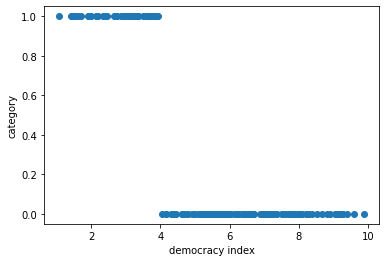

In [51]:
import matplotlib.pyplot as plt

x = df['democracy_index']
y = df['category']
plt.xlabel('democracy index')
plt.ylabel('category')


plt.scatter(x,y)

**I attempted to plot the graph with the information we had without implementing any clustering technique. Clearly, this does not yield an effective visual result. Therefore, we will attempt to create meaningful visualizations by means of clustering methods in the following steps.**

### **Task 3:**  Preprocess the data (if necessary), such as normalizing or scaling the features 
**a:** Find out why we need to maintain a uniform scale across the variables for K-means and Hierarchical clustering  
**b:** Do we need to use scaling techniques for this dataset? 


****a answer:**** Uniform scale is important across variable for clustering mechanism such as K-means and Hierarchical clustering. For example, the features that need to be clustered will have to have same scale so that the results are not skewed across different values and data with different units and measurement.

****b answer:**** In my opinion, we should scale the data of the features, even though they are of the same scale and the data ranges do not vary much. Scaling it would clean the data more. This will lead to a better clustering result.

In [52]:
#select the columns to be used in clustering

feature = df[['electoral_processand_pluralism', 'functioning_of_government', 'political_participation', 'political_culture', 'civil_liberties']]


In [53]:
#Preprocessing the data using StandardScaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#scale the feature df
feature_scaled = scaler.fit_transform(feature) #store preprocessed data in feature_scaled

### **Task 4:**  Implement K-means clustering to categorize the data into clusters 
**a:** Use elbow method to determine number of clusters   
**b:** Verify if the solution offered by the elbow method and the actual soultion (number of regimes) match   
**c:** Do we need to use elbow method to detrmine number of clusters for this dataset?   


**a.** Implementing the elbow method to find the number of clusters 

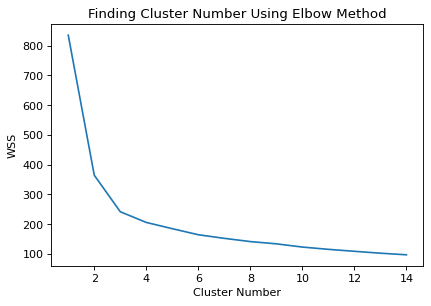

In [54]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

wss = [] #create an empty list to store values later 


for i in range(1,15):
     
    kmeans = KMeans(n_clusters=i) #run the algorithm from 1 to 14 inclusive. 
    kmeans.fit(feature_scaled) #fit the model to the preprocessed data 
    wss.append(kmeans.inertia_) #calculate the value of wss and add it into the list "wss"

# Plot the elbow method
plt.figure(dpi=80)
plt.plot(range(1,15),wss) #number of iteration in x axis and wss in y axis. 
plt.title('Finding Cluster Number Using Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('WSS')

plt.show()

**b.** The derived number of cluster through the elbow method is 4. The expected number of the clusters is 4. 

**c.** This dataset already shows that the regimes are categorized in 4 different clusters. Therefore, I would not use the elbow method to **determine** the clustering number. I would use the elbow method to **verify** the number. 

#### KMeans Clustering

We will create kmeans cluster and we will add the values as a column into our dataframe to plot density plot

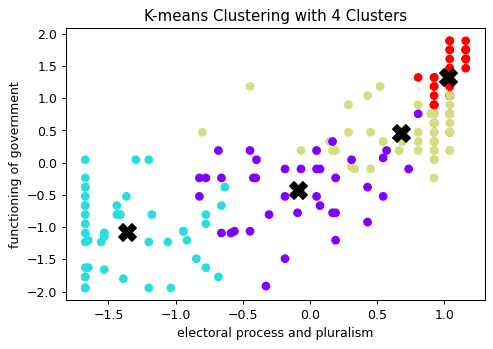

In [55]:
kmeans = KMeans(n_clusters=4) #since the number of clusters is 4. 
clusters = kmeans.fit_predict(feature_scaled) #train the kmeans model on the feature_scaled data 

#add values as a column into our dataframe 
df['kmeans_cluster'] = kmeans.labels_ 

# Plotting the clusters and centroids

plt.figure(dpi=90)
plt.scatter(feature_scaled[:, 0], feature_scaled[:, 1], c=clusters, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X')
plt.title("K-means Clustering with 4 Clusters")
plt.xlabel('electoral process and pluralism')
plt.ylabel('functioning of government')
plt.show()

### **Task 5:**  Implement Hierarchical clustering using an appropriate linkage method 
**a:** Try different linkage criteria 


There are different linkage criteria such as, single, complete,average, ward. We will try complete, average and ward.

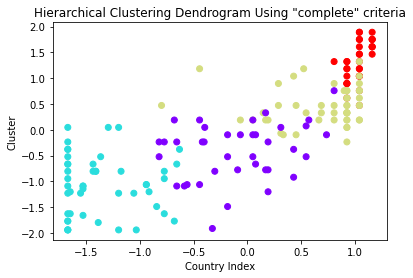

In [56]:
#using the 'complete' linkage criteria 

import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

#cluster the data using hierarchical clustering 
agg_clustering_complete = AgglomerativeClustering(n_clusters=4, linkage='complete')
linkage_matrix_complete = agg_clustering_complete.fit_predict(feature_scaled) 

# Plot the scatter plot
plt.scatter(feature_scaled[:, 0], feature_scaled[:, 1], c=clusters, cmap='rainbow')
plt.title('Hierarchical Clustering Dendrogram Using "complete" criteria')
plt.xlabel('Country Index')
plt.ylabel('Cluster')
plt.show()

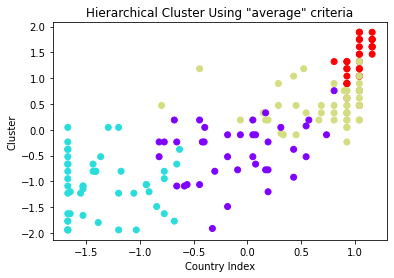

In [57]:
#Using the 'average' linkage criteria
agg_clustering_avg = AgglomerativeClustering(n_clusters=4, linkage='average')
linkage_matrix_avg = agg_clustering_avg.fit_predict(feature_scaled) 

# Plot the scatter plot
plt.scatter(feature_scaled[:, 0], feature_scaled[:, 1], c=clusters, cmap='rainbow')
plt.title('Hierarchical Cluster Using "average" criteria')
plt.xlabel('Country Index')
plt.ylabel('Cluster')
plt.show()

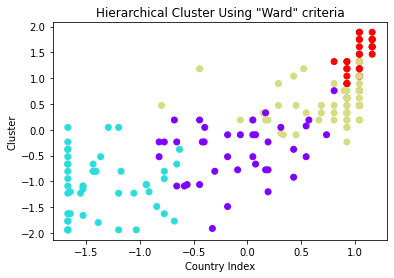

In [58]:
#Using the 'Ward' linkage criteria 
agg_clustering_ward = AgglomerativeClustering(n_clusters=4, linkage='ward')
linkage_matrix_ward = agg_clustering_ward.fit_predict(feature_scaled) 


#make a column in the original dataframe to plot the density plot later 
df['Hierarchical_Cluster'] = agg_clustering_ward.fit_predict(feature_scaled)

# Plot the scatter plot
plt.scatter(feature_scaled[:, 0], feature_scaled[:, 1], c=clusters, cmap='rainbow')
plt.title('Hierarchical Cluster Using "Ward" criteria')
plt.xlabel('Country Index')
plt.ylabel('Cluster')
plt.show()

### **Task 6:** Plot the democracy index values

For aforementioned methods generate the clustering solution. The clustering solution simply groups the countries into different groups   
based on similarity. Once the solution is obtained, plot density plots of democracy index values considering all the countries within a group. 


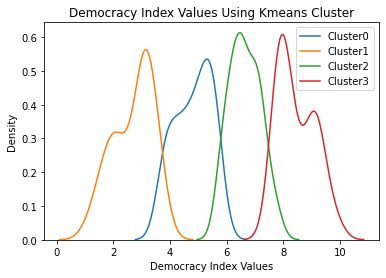

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

for cluster_num in range(4): #for loop for 4 clusters
    cluster_data = df[df['kmeans_cluster'] == cluster_num]
    sns.kdeplot(cluster_data['democracy_index'], label=f'Cluster{cluster_num}')

    
plt.title('Democracy Index Values Using Kmeans Cluster')
plt.xlabel('Democracy Index Values')
plt.ylabel('Density')
plt.legend()
plt.show()


#### To plot the density plot using the hierarchical cluster, we will use the results from the ward criteria. The density plot as below: 

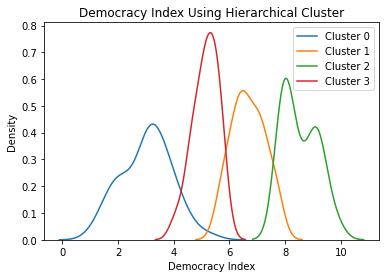

In [60]:
for cluster_num in range(4): #for loop for 4 clusters
    cluster_data = df[df['Hierarchical_Cluster'] == cluster_num]
    sns.kdeplot(cluster_data['democracy_index'], label=f'Cluster {cluster_num}')
    
plt.title('Democracy Index Using Hierarchical Cluster')
plt.xlabel('Democracy Index')
plt.ylabel('Density')
plt.legend()
plt.show()


**Conclusion**: I think that k-means clustering is a better system to use bigger sets of data. It yields more reliable clustering system for this project. 